---
layout: page
title: Simulação
nav_order: 13
---
[<img src="https://raw.githubusercontent.com/flaviovdf/fcd/master/assets/colab_favicon_small.png" style="float: right;">](https://colab.research.google.com/github/flaviovdf/fcd/blob/master/_lessons/13-Simulacao.ipynb)

# Tópico 13 – Simulação
{: .no_toc .mb-2 }

A simulação de dados é essencial na estatística não paramétrica. Vamos aprender a combinar laços em python e a biblioteca numpy para simular dados.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Uso do `np.random`
1. Resolvendo o problema de Monty Hall
1. O poder de simulações como uma alternativa às soluções exatas

{: .no_toc .text-delta }
Material Adaptado do [DSC10 (UCSD)](https://dsc10.com/)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas as pd
plt.style.use('ggplot')

## Simulação

### Simulação

- Qual é a probabilidade de obter 60 ou mais caras se jogarmos 100 moedas?

- Embora _poderíamos_ calculá-lo manualmente (e aprenderemos como fazê-lo em cursos futuros), também podemos aproximá-lo usando o computador:
1. Descubra como fazer um experimento (ou seja, jogar 100 moedas).
2. Execute o experimento várias vezes.
3. Encontre a proporção de experimentos em que o número de cabeças foi 60 ou mais.

- É assim que usaremos a **simulação** – para aproximar uma probabilidade por meio de cálculo.
- As técnicas que apresentaremos na palestra de hoje aparecerão em quase todas as palestras do restante do trimestre!

### Fazendo uma escolha aleatória

- Para simular, precisamos de uma forma de realizar um experimento aleatório no computador (por exemplo, jogar uma moeda, lançar um dado).

- Uma função útil é `np.random.choice(options)`.
- A entrada, `options`, é uma lista ou array para escolher.
- A saída é um elemento aleatório em `opções`. Por padrão, todos os elementos têm a mesma probabilidade de serem escolhidos.

In [2]:
# Simulate a fair coin flip
np.random.choice(['Heads', 'Tails'])

'Heads'

In [3]:
# Simulate a roll of a die
np.random.choice(np.arange(1, 7))

4

### Fazendo múltiplas escolhas aleatórias

`np.random.choice(options, n)` retornará um array de `n` elementos selecionados aleatoriamente de `options`.

In [4]:
# Simulate 10 fair coin flips
np.random.choice(['Heads', 'Tails'], 10)

array(['Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails', 'Heads',
       'Heads', 'Tails', 'Heads'], dtype='<U5')

### Com substituição vs. sem substituição

- Por padrão, `np.random.choice` seleciona **com** substituição.
- Ou seja, após fazer uma seleção, essa opção ainda estará disponível.
- por exemplo. se toda vez que você tirar uma bola de gude de um saco, você a colocará de volta.
- Se uma opção só puder ser selecionada uma vez, selecione **sem** substituição especificando `replace=False`.
- por exemplo. se toda vez que você tirar uma bolinha de gude de um saco, você não a colocar de volta.

In [5]:
# Choose three colleges to win free HDH swag
colleges = ['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh']

np.random.choice(colleges, 3, replace=False)

array(['Thurgood Marshall', 'Sixth', 'Eleanor Roosevelt'], dtype='<U17')

## Exemplo: Qual é a probabilidade de obter 60 ou mais caras se jogarmos 100 moedas?

### Lançando moedas

Qual é a probabilidade de obtermos 60 ou mais caras se lançarmos 100 moedas?

**Estratégia:**

1. Descubra como fazer um experimento (ou seja, jogar 100 moedas).
2. Execute o experimento várias vezes.
3. Encontre a proporção de experimentos em que o número de cabeças foi 60 ou mais.

### Etapa 1: descubra como fazer um experimento

- Use `np.random.choice` para lançar 100 moedas.
- Use `np.count_nonzero` para contar o número de caras.
- `np.count_nonzero(array)` retorna o número de entradas em `array` que são `True`.


In [6]:
coins = np.random.choice(['Heads', 'Tails'], 100)
coins

array(['Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Heads', 'Heads',
       'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads', 'Tails',
       'Heads', 'Tails', 'Tails', 'Heads', 'Heads', 'Heads', 'Tails',
       'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails', 'Heads',
       'Tails', 'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads',
       'Tails', 'Tails', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails',
       'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Tails',
       'Tails', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails',
       'Tails', 'Heads', 'Tails', 'Heads', 'Heads', 'Heads', 'Heads',
       'Heads', 'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails',
       'Heads', 'Tails', 'Heads', 'Heads', 'Tails', 'Tails', 'Heads',
       'Tails', 'Heads', 'Heads', 'Heads', 'Heads', 'Tails', 'Tails',
       'Heads', 'Heads', 'Tails', 'Tails', 'Tails', 'Tails', 'Tails',
       'Tails', 'Tails', 'Heads', 'Tails', 'Heads', 'Tails', 'Tails',
       'Heads', 'Hea

In [7]:
(coins == 'Heads').sum()

42

In [8]:
np.count_nonzero(coins == 'Heads') # counts the number of Trues in sequence

42

- **P:** Por que é chamado de `count_nonzero`?
- **A:** Em Python, `True == 1` e `False == 0`, portanto, contar os elementos diferentes de zero conta o número de `True`s.

### À parte: Colocando o experimento em uma função

É uma boa ideia fazer isso, pois facilita a execução repetida do experimento.

In [9]:
def coin_experiment():
    coins = np.random.choice(['Heads', 'Tails'], 100)
    return np.count_nonzero(coins == 'Heads')

In [10]:
coin_experiment()

53

### Etapa 2: Repita o experimento

- Como executamos o mesmo código muitas vezes? **Usando um loop `for`!**
- Cada vez que executarmos o experimento, precisaremos armazenar os resultados em um array.
- Para fazer isso, usaremos `np.append`!

In [11]:
head_counts = np.array([])
head_counts

array([], dtype=float64)

In [12]:
head_counts = np.append(head_counts, 15)
head_counts

array([15.])

In [13]:
head_counts = np.append(head_counts, 25)
head_counts

array([15., 25.])

### Etapa 2: repita o experimento

In [14]:
# Specify the number of repetitions
repetitions = 10000

# Create an empty array to store the results
head_counts = np.array([])

for i in np.arange(repetitions):
    # For each repetition, run the experiment and add the result to head_counts
    head_count = coin_experiment()
    head_counts = np.append(head_counts, head_count)

In [15]:
len(head_counts)

10000

In [16]:
head_counts

array([52., 51., 52., ..., 44., 50., 43.])

### Etapa 3: Encontre a proporção de experimentos em que o número de cabeças foi 60 ou mais

In [17]:
# In how many experiments was the number of heads >= 60?
at_least_60 = np.count_nonzero(head_counts >= 60)
at_least_60

291

In [18]:
# What is this as a proportion?
at_least_60 / repetitions

0.0291

In [19]:
# Can also use np.mean()! Why?
np.mean(head_counts >= 60)

0.0291

Isso está bem próximo da verdadeira resposta teórica!

In [20]:
# The theoretical answer – don't worry about how or why this code works
import math
sum([math.comb(100, i) * (1 / 2) ** 100 for i in np.arange(60, 101)])

0.028443966820490395

### Visualizando a distribuição

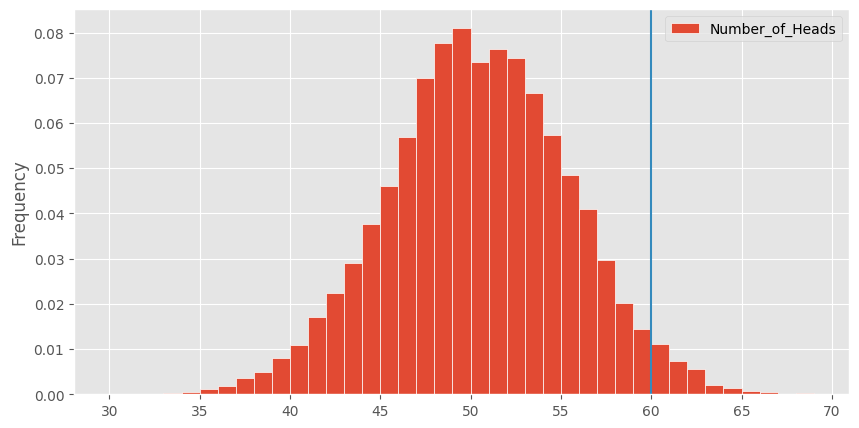

In [21]:
pd.DataFrame().assign(
    Number_of_Heads=head_counts
).plot(kind='hist', bins=np.arange(30, 70), density=True, ec='w', figsize=(10, 5));
plt.axvline(60, color='C1');

- Este histograma descreve a distribuição do número de cabeças em cada experimento.
- Agora vemos outra razão para usar histogramas de densidade.
- Usar densidade significa que as áreas se aproximam de **probabilidades**.

## Exemplo: O problema de “Monty Hall”

![](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Monty_open_door.svg/1920px-Monty_open_door.svg.png)

### O problema de "Monty Hall"

Suponha que você esteja em um game show e tenha a opção de escolher entre três portas: atrás de uma porta está um carro 🚗; atrás dos outros, cabras 🐐🐐.

- Você escolhe uma porta, digamos a nº 2, e o anfitrião, **que sabe o que tem atrás das portas**, abre outra porta, digamos a nº 3, que tem uma cabra.

- Ele então diz para você: “Você quer escolher a porta número 1?”

- **Pergunta:** É vantajoso mudar de escolha?

_(A questão foi colocada na coluna "Ask Marilyn" da revista Parade em 1990. É chamada de "problema de Monty Hall" porque Monty Hall apresentou um game show semelhante chamado "Let's Make a Deal".)_

### Verificação de conceito ✅

Você selecionou originalmente a porta nº 2. O anfitrião revela que a porta nº 3 tem uma cabra atrás dela. O que você deveria fazer?

A. É melhor ficar com a porta número 2; tem chances tão altas de vencer quanto a porta número 1. Não importa se você muda ou não.

B. Mude para a porta número 1; tem uma chance maior de vencer do que a porta 2.

### Vamos ver 🤔

- Usaremos simulação para calcular:
- A probabilidade de ganhar se mudarmos.
- A probabilidade de ganhar se ficarmos.
- Qualquer estratégia que tenha maior probabilidade de ganhar é melhor!

### Hora de simular!

Vamos **simular** o problema de Monty Hall muitas vezes para **estimar** a probabilidade de vitória se mudarmos.

1. Descubra como simular um jogo de Monty Hall.
2. Jogue o jogo várias vezes, trocando a cada vez.
3. Conte a proporção de vitórias.

Então repetiremos o processo para ficar a cada vez.

### Passo 1: Simule um único jogo

Quando você escolhe uma porta, há três resultados igualmente prováveis:

1. Carro.
1. Cabra nº 1.
1. Cabra #2.

In [22]:
behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
behind_picked_door

'Car'

### Passo 1: Simule um único jogo

Quando Monty abre uma porta diferente, ele sempre revela uma cabra.

In [23]:
if behind_picked_door == 'Goat #1':
    revealed = 'Goat #2'
elif behind_picked_door == 'Goat #2':
    revealed = 'Goat #1'
else:
    revealed = np.random.choice(['Goat #1', 'Goat #2'])

revealed

'Goat #1'

### Passo 1: Simule um único jogo

Se você sempre trocar, acabará ganhando o prêmio que não está nem `behind_picked_door` nem `revealed`.

In [24]:
for prize in ['Car', 'Goat #1', 'Goat #2']:
    if prize != behind_picked_door and prize != revealed:
        your_prize = prize

your_prize

'Goat #2'

### Passo 1: Simule um único jogo

Vamos transformar isso em uma função para facilitar a repetição:

In [25]:
def simulate_switch_strategy():
    behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
    
    if behind_picked_door == 'Goat #1':
        revealed = 'Goat #2'
    elif behind_picked_door == 'Goat #2':
        revealed = 'Goat #1'
    else:
        revealed = np.random.choice(['Goat #1', 'Goat #2'])
        
    for prize in ['Car', 'Goat #1', 'Goat #2']:
        if prize != behind_picked_door and prize != revealed:
            your_prize = prize
        
    #print(behind_picked_door, 'was behind the door.', revealed, 'was revealed by the host. Your prize was:', your_prize)
    return your_prize

In [26]:
simulate_switch_strategy()

'Goat #1'

### Etapa 2: jogue o jogo várias vezes

Devemos guardar seu prêmio em cada jogo. Para fazer isso, vamos usar `np.append`:

In [27]:
repetitions = 10000

your_prizes = np.array([])

for i in np.arange(repetitions):
    your_prize = simulate_switch_strategy()
    your_prizes = np.append(your_prizes, your_prize)

In [28]:
your_prizes

array(['Car', 'Car', 'Goat #2', ..., 'Goat #2', 'Goat #2', 'Car'],
      dtype='<U32')

### Etapa 3: contar a proporção de vitórias para esta estratégia (troca)

In [29]:
your_prizes

array(['Car', 'Car', 'Goat #2', ..., 'Goat #2', 'Goat #2', 'Car'],
      dtype='<U32')

In [30]:
np.count_nonzero(your_prizes == 'Car')

6739

In [31]:
np.count_nonzero(your_prizes == 'Car') / repetitions

0.6739

Isso está bem próximo da verdadeira probabilidade de ganhar se você trocar, $\frac{2}{3}$.

### Implementação alternativa

- Analisando nossa implementação, monitoramos seu prêmio em cada jogo.

- No entanto, tudo o que realmente precisávamos saber era o **número de jogos** em que você ganhou um carro.

- Ideia: Mantenha um registro do número de vezes que você ganhou um carro. Ou seja, inicialize `car_count` com 0 e adicione 1 sempre que seu prêmio for um carro.

In [32]:
car_count = 0

In [33]:
for i in np.arange(repetitions):
    your_prize = simulate_switch_strategy()
    if your_prize == 'Car':
        car_count = car_count + 1

In [34]:
car_count / repetitions

0.6621

Não são necessárias matrizes! Esta estratégia nem sempre funciona; depende do objetivo da simulação.

### E se você ficar sempre com sua porta original?

- Neste caso, o seu prêmio é sempre o mesmo que estava atrás da porta escolhida.

In [35]:
car_count = 0

for i in np.arange(repetitions):
    behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
    your_prize = behind_picked_door
    if your_prize == 'Car':
        car_count = car_count + 1
        
car_count / repetitions

0.3384

- Isso é bem próximo da verdadeira probabilidade de ganhar se você ficar, $\frac{1}{3}$.

- **Conclusão:** É melhor mudar.

- **Explicação:**
- Se você escolher originalmente uma cabra, Monty revelará a outra cabra e você ganhará o carro trocando.
- Se você escolher originalmente um carro, você ganhará ficando.
- Mas há 2 cabras e 1 carro, então você ganha o dobro trocando.

### Coluna de Marilyn vos Savant na revista Parade

![](https://parade.com/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTkwNTc4NzM1NjQ4MTU1NTE2/marilynfirstquestions.jpg)

<div style="display: flex; margem superior: 0,5 pol; margem direita: 1 pol">
<div style="largura: 85%;">
<ul>
<li>Quando um leitor fez esta pergunta, vos Savant afirmou a resposta correta: <i>switch</i>.</li>
<li>Ela recebeu mais de 10.000 cartas em desacordo, incluindo mais de 1.000 cartas de pessoas com doutorado.</li>
<li>Isso se tornou uma controvérsia nacional, recebendo até um <a href='https://www.nytimes.com/1991/07/21/us/behind-monty-hall-s-doors-puzzle-debate-and -answer.html'>artigo de primeira página do New York Times em 1991.</a></li>
</ul>
</div>
</div>


### Qual a intuição da resposta?

1. Abaixo temos todas as três configurções iniciais (nas linhas). Em duas delas, trocar é melhor. Em uma não.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Monty_Hall_Problem_-_Standard_probabilities.svg/1024px-Monty_Hall_Problem_-_Standard_probabilities.svg.png)

## Resumo, da próxima vez

### Simulação encontra probabilidades

- Calcular probabilidades é importante, mas pode ser difícil!
- Você aprenderá muitas fórmulas nas futuras aulas do DSC.
- A simulação nos permite encontrar probabilidades por meio da computação em vez da matemática.
- Muitos cenários do mundo real são complicados.
- A simulação é muito mais fácil que a matemática em muitos destes casos.

### A "receita" da simulação

Para estimar a probabilidade de um evento por meio de simulação:
1. Crie uma função que execute o experimento uma vez.
2. Execute essa função muitas e muitas vezes (geralmente 10.000) com um loop `for` e salve os resultados em um array com `np.append`.
3. Calcule a proporção de vezes que o evento ocorre usando `np.count_nonzero`.